In [2]:
from dl_util import *
from ml_util import *

from eval_class_util import *
from run_eval import split_fit_plot_predict

Using TensorFlow backend.


### Data Loading and Cleaning

In [3]:
df = pd.read_csv('eval_datasets/toxicity.txt','\t')
tox = df[pd.notnull(df['nontoxic'])]
tox_maccs_all  = loadNumpy('maccs_toxic_all')

In [4]:
tox_notnull_indices = df[df['nontoxic'].notnull()].index.tolist()

In [5]:
tox_smiles= tox['Canonical_QSARr'].tolist()
tox_nontoxic = tox['nontoxic'].tolist()

In [6]:
saveData(tox_smiles,'tox_smiles')

In [8]:
len(tox_smiles), len(tox_maccs_all)

(8981, 8994)

In [5]:
tox_maccs = []
for i in tox_notnull_indices: 
    tox_maccs += [tox_maccs_all[i]]
    
tox_maccs = np.array(tox_maccs)

In [6]:
len(tox_maccs), len(tox_nontoxic), len(tox_notnull_indices)

(8981, 8981, 8981)

### Converting SMILES to sequence data 

In [7]:
len_tox_smiles = []
for SMILE in tox_smiles:
    len_tox_smiles += [len(SMILE)]
    
max_len_tox = max(len_tox_smiles)

tox_vocab_size = generate_onehot_encoding(tox_smiles,'vocab_size')
tox_vocab_size, max_len_tox

(42, 940)

In [8]:
tox_encodings = generate_onehot_encoding(tox_smiles)
tox_sequences = sequence.pad_sequences(tox_encodings, maxlen=max_len_tox)

In [5]:
tox_sequences = loadNumpy('tox_sequences')
tox_maccs = loadNumpy('tox_maccs')
tox_nontoxic = loadNumpy('tox_nontoxic')
tox_vocab_size, max_len_tox = (42, 940)

In [7]:
tox_nontoxic

array([False, False, False, ..., False, False, False])

### Train and Test set preparation 

In [9]:
X1_tox = tox_sequences
X2_tox = tox_maccs 
Y_tox = tox_nontoxic
# X1_train_tox, X1_test_tox, y_train_tox, y_test_tox = train_test_split(X1_tox, Y_tox, random_state=1024)
# X2_train_tox, X2_test_tox, y_train_tox, y_test_tox = train_test_split(X2_tox, Y_tox, random_state=1024)

## Training

#### <font color="red"> CNN only </font>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 940, 32)           1344      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 940, 32)           3104      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 470, 32)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 470, 32)           3104      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 235, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 7520)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7521      
Total para

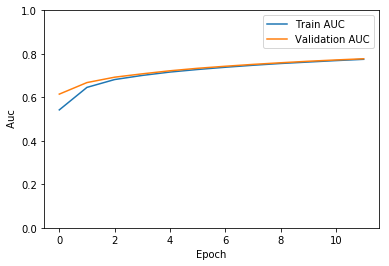

In [15]:
split_fit_plot_predict(cnn_model,  tox_sequences, tox_maccs, tox_nontoxic, tox_vocab_size, max_len_tox, "tox")

#### MLP only 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               86016     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total para

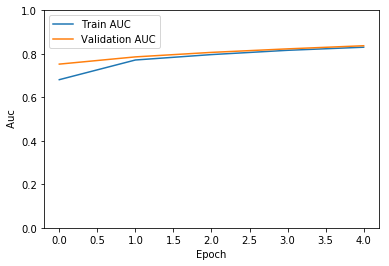

In [17]:
split_fit_plot_predict(mlp_model,  tox_sequences, tox_maccs, tox_nontoxic, tox_vocab_size, max_len_tox, "tox")

#### CNN-MLP

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 940, 32)           1344      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 940, 32)           3104      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 470, 32)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 470, 32)           3104      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 235, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7520)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                481344    
Total para

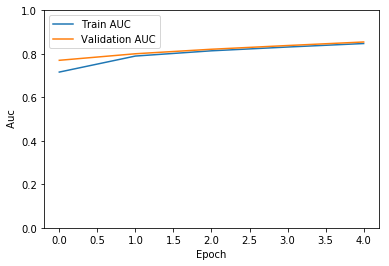

In [18]:
split_fit_plot_predict(merged_cnn_mlp_model,  tox_sequences, tox_maccs, tox_nontoxic, tox_vocab_size, max_len_tox,"tox")

In [10]:
split_fit_plot_predict(merged_cnn_rnn_mlp_model,  tox_sequences, tox_maccs, tox_nontoxic, tox_vocab_size, max_len_tox,"tox")

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 271,393
Trainable params: 271,393
Non-trainable params: 0
_________________________________________________________________
Train on 6061 samples, validate on 674 samples
Epoch 1/20
6061/6061 [==============================] - 110s 18ms/step - loss: 0.5615 - acc: 0.7129 - precision: 0.4276 - recall: 0.9947 -

NameError: global name 'in_jupyter' is not defined

In [11]:
saveNumpy(tox_sequences, 'tox_sequences')
saveNumpy(tox_maccs, 'tox_maccs' )
saveNumpy(tox_nontoxic, 'tox_nontoxic')

('tox_sequences', 'saved successfully in', 'data')
('tox_maccs', 'saved successfully in', 'data')
('tox_nontoxic', 'saved successfully in', 'data')
